#Pizza Place Sales Analysis

##Introduction

The purpose of this analysis is to explore and understand sales patterns from a year’s worth of data collected at a fictitious pizza place. By analyzing the data, we aim to uncover insights into customer ordering behavior, revenue drivers, and product performance, which can help guide business decisions such as menu optimization, staffing, and promotions.

##Dataset Description

The dataset is provided in four CSV files:

Orders.csv → Contains information about each order, including order ID, date, and time.

Order_Details.csv → Contains the individual items within each order, including order ID, pizza ID, and quantity.

Pizzas.csv → Contains details about each pizza, including pizza ID, size, price, and corresponding pizza type.

Pizza_Types.csv → Contains information about pizza types, including name, category, and ingredients.

##Key Questions to Answer

What is the total revenue generated?

How many pizzas were sold in total?

How many unique orders were placed?

How many different pizza types are offered on the menu?

What is the average price of pizzas?

What are the peak hours for sales?

Which days of the week have the highest sales?

What are the top 5 bestselling pizzas?

What do monthly sales trends look like, and are there noticeable patterns?

Which pizzas are underperforming on the menu?

#Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Loading the datasets

In [21]:
orders = pd.read_csv(r"orders.csv")
order_details = pd.read_csv(r"order_details.csv")
pizzas = pd.read_csv(r"pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin1")

#Joining the datasets

In [22]:
# Merge all four CSVs into one DataFrame
df = order_details.merge(orders, on="order_id", how="left") \
                  .merge(pizzas, on="pizza_id", how="left") \
                  .merge(pizza_types, on="pizza_type_id", how="left")

In [23]:
# Convert date and time columns to proper formats
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

In [24]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,2026-01-11 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,2026-01-11 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,2026-01-11 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,2026-01-11 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,2026-01-11 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


#Creating the Sales column

In [25]:
df["sales"] = df["quantity"] * df["price"]


In [26]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales
0,1,1,hawaiian_m,1,2015-01-01,2026-01-11 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,2026-01-11 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,2026-01-11 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,2026-01-11 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,2026-01-11 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,2026-01-11 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,2026-01-11 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95
48617,48618,21348,napolitana_s,1,2015-12-31,2026-01-11 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00
48618,48619,21349,mexicana_l,1,2015-12-31,2026-01-11 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25


#Analysis

In [27]:
#Calculating the total sales

total_revenue = df["sales"].sum()
total_revenue


np.float64(817860.05)

### Total Revenue

**Finding:**  
The total revenue generated from pizza sales during the period is **$817,860.05**.

**Insight:**  
This indicates a strong overall business performance, showing that the pizza store has a healthy revenue stream driven by consistent customer demand.

**Impact / Business Value:**  
- Helps management assess overall financial performance.
- Can be used as a benchmark for future sales targets.
- Useful for evaluating the effectiveness of marketing and pricing strategies.


In [28]:
#Calculating the total quantity

total_quantity = df["quantity"].sum()
total_quantity


np.int64(49574)

### Total Quantity Sold

**Finding:**  
A total of **49,574 pizzas** were sold during the period.

**Insight:**  
High sales volume suggests strong customer engagement and repeat purchases, especially during peak hours and high-demand days.

**Impact / Business Value:**  
- Supports inventory planning and supplier negotiations.
- Helps determine staffing needs during high-demand periods.
- Indicates product-market fit.


In [29]:
#Calculating the total order

total_orders = df["order_id"].nunique()
total_orders


21350

### Total Orders

**Finding:**  
There were **21,350 unique orders** placed.

**Insight:**  
The difference between total quantity sold and total orders suggests that customers often purchase multiple pizzas per order.

**Impact / Business Value:**  
- Opportunity to increase order value through combo deals.
- Helps in understanding customer purchasing behavior.
- Useful for optimizing checkout and delivery logistics.


In [30]:
#Number of pizza type

num_pizza_types = df["name"].nunique()
num_pizza_types


32

### Pizza Variety

**Finding:**  
The store offers **32 different pizza types**.

**Insight:**  
A wide variety of pizzas helps cater to different customer preferences but may increase operational complexity.

**Impact / Business Value:**  
- Enables targeted promotions for specific pizza categories.
- Helps management decide whether to streamline or expand the menu.


In [31]:
#Average price of pizza

avg_price = df["price"].mean()
avg_price


np.float64(16.494132044426163)

### Average Pizza Price

**Finding:**  
The average price of a pizza is approximately **$16.49**.

**Insight:**  
This suggests a mid-range pricing strategy, making the products accessible while maintaining profitability.

**Impact / Business Value:**  
- Supports competitive pricing decisions.
- Helps assess price sensitivity among customers.
- Useful for discount and promotional planning.


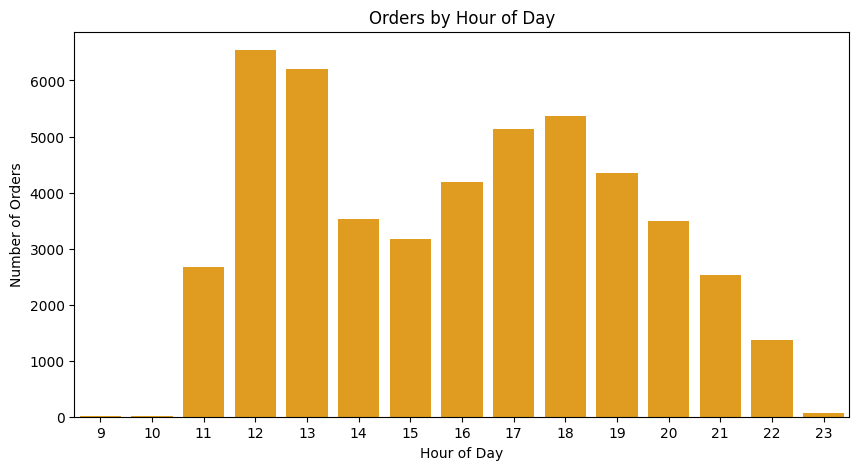

In [32]:
#Peak hours of sales

df["hour"] = df["time"].dt.hour
peak_hours = df.groupby("hour")["order_id"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=peak_hours.index, y=peak_hours.values, color="orange")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()


### Peak Hours of Sales

**Finding:**  
Orders peak between **12 PM–1 PM** and **5 PM–7 PM**.

**Insight:**  
These time periods correspond to lunch and dinner hours, indicating predictable customer behavior.

**Impact / Business Value:**  
- Helps optimize staff scheduling.
- Ensures sufficient inventory during peak hours.
- Improves customer satisfaction by reducing wait times.


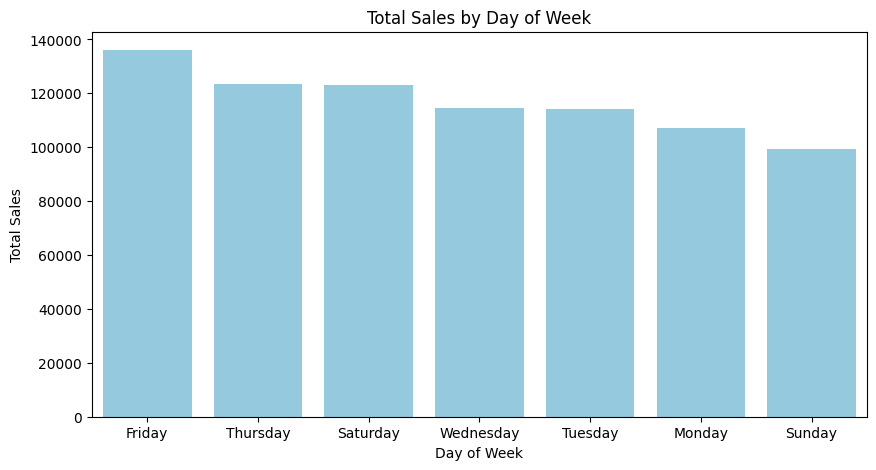

In [33]:
#Sales by Day of the Week

df["day_of_week"] = df["date"].dt.day_name()
sales_by_day = df.groupby("day_of_week")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, color="skyblue")
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


### Sales by Day of Week

**Finding:**  
**Friday** records the highest total sales, while **Sunday** has the lowest.

**Insight:**  
Customers are more likely to order pizza towards the end of the workweek, possibly due to social gatherings and reduced cooking at home.

**Impact / Business Value:**  
- Enables targeted promotions on low-performing days.
- Helps plan weekend staffing and inventory.
- Supports strategic discount campaigns.


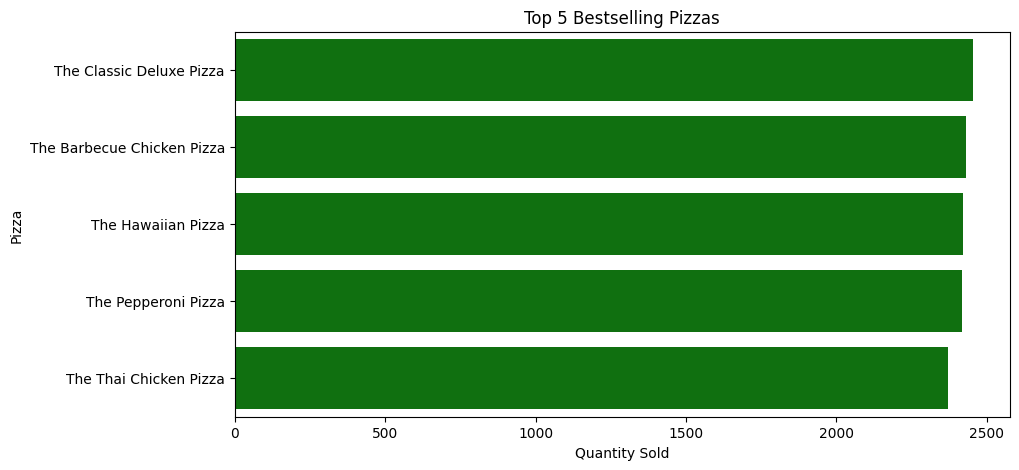

In [34]:
#Top 5 Bestselling Pizzas

bestsellers = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=bestsellers.values, y=bestsellers.index, color="green")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza")
plt.show()


### Top 5 Bestselling Pizzas

**Finding:**  
The most popular pizzas include:
- The Classic Deluxe Pizza  
- The Barbecue Chicken Pizza  
- The Hawaiian Pizza  
- The Pepperoni Pizza  
- The Thai Chicken Pizza  

**Insight:**  
These pizzas consistently attract customers and drive a large portion of total sales.

**Impact / Business Value:**  
- Prioritize these items in promotions and advertisements.
- Ensure constant availability of ingredients.
- Use them as bundle anchors to increase average order value.


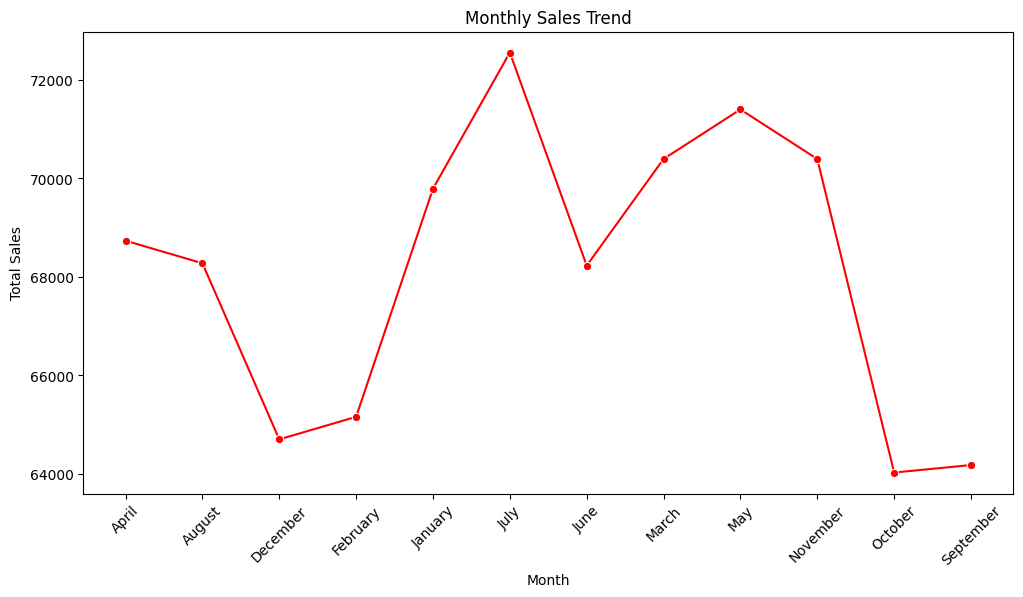

In [35]:
#Monthly Sales Trend

df["month"] = df["date"].dt.month_name()
monthly_sales = df.groupby("month")["sales"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


### Monthly Sales Trend

**Finding:**  
Sales peak around **July and May**, with noticeable declines in **October and September**.

**Insight:**  
Sales fluctuations may be influenced by seasonal demand, holidays, or customer spending patterns.

**Impact / Business Value:**  
- Helps forecast revenue and manage cash flow.
- Supports seasonal marketing strategies.
- Guides planning for low-demand months.


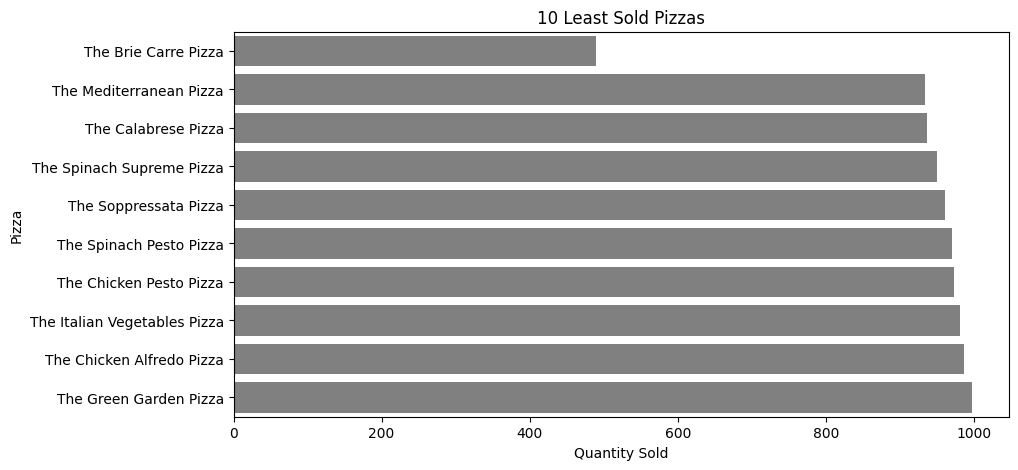

In [36]:
#Poorly Performing Pizzas

low_sales = df.groupby("name")["quantity"].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=low_sales.values, y=low_sales.index, color="gray")
plt.title("10 Least Sold Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza")
plt.show()


### Poorly Performing Pizzas

**Finding:**  
Some pizza types consistently record low sales volumes.

**Insight:**  
Low demand may be due to limited customer preference or lack of visibility.

**Impact / Business Value:**  
- Consider removing or reformulating low-performing items.
- Use discounts or promotions to test renewed interest.
- Reduces waste and operational costs.


In [37]:
#Average order value

avg_order_value = total_revenue / total_orders
avg_order_value


np.float64(38.30726229508197)

### Average Order Value (AOV)

**Finding:**  
The average order value is **$38.31**, calculated as total revenue divided by the total number of orders.

**Insight:**  
On average, each customer spends about $38 per order, indicating that customers frequently purchase multiple pizzas or higher-priced items in a single transaction.

**Impact / Business Value:**  
- Helps evaluate customer spending behavior.
- Provides a key metric for measuring the success of upselling and bundle offers.
- Can guide strategies such as combo meals, add-ons, and targeted promotions to increase revenue per order.


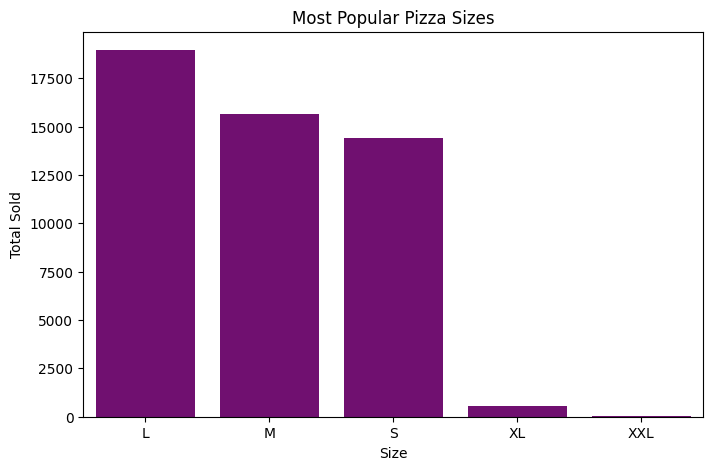

In [38]:
#Most popular pizza sizes

size_distribution = df.groupby("size")["quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=size_distribution.index, y=size_distribution.values, color="purple")
plt.title("Most Popular Pizza Sizes")
plt.xlabel("Size")
plt.ylabel("Total Sold")
plt.show()

### Most Popular Pizza Sizes

**Visualization Insight**

Large (L) pizzas are the most popular size, followed by Medium (M) and Small (S). Extra Large (XL) and XXL pizzas record extremely low sales volumes.

**Business Interpretation**

Customers strongly prefer Large-sized pizzas, indicating they offer the best perceived value for money. Inventory planning, pricing strategies, and promotions should prioritize Large and Medium sizes, while XL and XXL sizes may need reevaluation or targeted marketing.


#Conclusion

Through this analysis of the Pizza Place Sales dataset, we gained valuable insights into business performance and customer ordering behavior.
